In [10]:
import numpy as np
#import matplotlib.pyplot as plt
import plotly as plt
from DumbTruck import DumbTruck
from kalmanfilter import KalmanFilter

In [11]:
#Set up the data generation
t = 1000
dt = 0.02
k = 0.1
ep = 1
nu = 0.1

gen = DumbTruck()
initial = np.array([[1],[1]])
process = gen.process(initial, t=t, dt=dt, k=k, ep=ep)
measure = gen.measure(process, nu=nu)

In [12]:
output = np.array([[], []])
filter = KalmanFilter(initial, dt, k, ep, nu, nu)
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (2,1)
    filter.predict(measure_t)
    kalman_output = filter.get_current_guess()
    output = np.append(output, kalman_output, axis=1)

In [13]:
sz = 5
a = 0.8
plt.scatter(np.arange(0, (t + 1) * dt,dt), process[0], s=sz, alpha=a)
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[0], s=sz, alpha=a)
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[0], s=sz, alpha=a)
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(["Process","Measure","Filter"])

AttributeError: module 'plotly' has no attribute 'scatter'

Text(0, 0.5, 'Velocity')

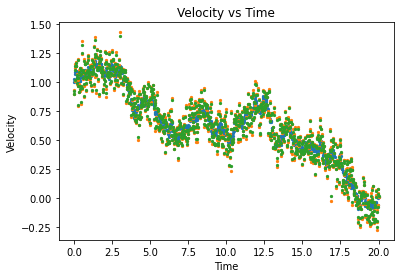

In [9]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[1], s=sz)
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[1], s=sz)
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[1], s=sz)
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")